# importing all libraries

In [1]:
import time

import pandas as pd
import numpy as np
import os
from pathlib import Path

import warnings

warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder


from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [2]:
#conda install py-xgboost

In [3]:
df1 = pd.read_excel('Savedata.xlsx',skiprows=1) 

In [4]:
df1 = df1.iloc[:,1:]

In [5]:
# dropping columns irrelevant
df1 = df1.drop(['VALENCE', 'AROUSAL'], axis=1)

In [6]:
# removing whitespaces
df1[df1.columns] = df1[df1.columns].apply(lambda x: x.str.strip() if (x.dtype == 'object') else x)
# check for special character in the columns 


In [7]:
df1.columns

Index(['Year', 'Updated Categories', 'Global Brand', 'Product Status',
       'Region', 'Country', 'Ad Format', 'Classification',
       'Meets Noticability Threshold', 'Meets on Memorability Threshold',
       ...
       'Movement - Robotic', 'Movement - Running', 'Movement - Steady',
       'Movement - Stomping', 'ENERGY LEVEL', 'EMOTIONAL PROFILE',
       'ENERGY DYNAMICS', 'EMOTIONAL DYNAMICS', 'METER', 'MUSICAL ERA'],
      dtype='object', length=268)

In [8]:
import janitor as jn
df1 = jn.clean_names(df1)
df1

,year,updated_categories,global_brand,product_status,region,country,ad_format,classification,meets_noticability_threshold,meets_on_memorability_threshold,...,movement_robotic,movement_running,movement_steady,movement_stomping,energy_level,emotional_profile,energy_dynamics,emotional_dynamics,meter,musical_era
0,2019,ICE CREAM,MAGNUM,RELAUNCH,EUROPE,GERMANY,SOCIAL MEDIA,GOOD+,YES,YES,...,NO,NO,NO,NO,HIGH,BALANCED,LOW,LOW,4/4,LATE 2000S / CONTEMPORARY
1,2019,ICE CREAM,MAGNUM,RELAUNCH,EUROPE,GERMANY,SOCIAL MEDIA,GOOD+,YES,YES,...,NO,NO,NO,NO,HIGH,BALANCED,LOW,LOW,4/4,LATE 2000S / CONTEMPORARY
2,2021,ICE CREAM,BREYERS,ESTABLISHED,EUROPE,GERMANY,DIGITAL OUTDOOR,NG+,NO,NO,...,NO,YES,NO,NO,MEDIUM,NEGATIVE,LOW,LOW,4/4,EARLY / MID 1990S
3,2020,PERSONAL CARE,DOVE MEN+CARE,ESTABLISHED,EUROPE,ITALY,VIDEO,NG+,NO,YES,...,NO,NO,NO,NO,HIGH,NEGATIVE,LOW,LOW,4/4,MID / LATE 1990S
4,2020,BEAUTY & WELLBEING,DOVE,ESTABLISHED,SEAA,VIETNAM,VIDEO,NG+,NO,YES,...,NO,NO,NO,NO,HIGH,POSITIVE,LOW,LOW,4/4,LATE 1990S / EARLY 2000S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,2022,HOME CARE,COMFORT,ESTABLISHED,SEAA,VIETNAM,SOCIAL MEDIA VIDEO,GOOD+,YES,YES,...,NO,YES,NO,NO,HIGH,BALANCED,LOW,LOW,NaN,LATE 1990S / EARLY 2000S
629,2022,HOME CARE,COMFORT,ESTABLISHED,SEAA,VIETNAM,SOCIAL MEDIA VIDEO,GOOD+,YES,YES,...,NO,NO,NO,NO,HIGH,NEGATIVE,LOW,LOW,NaN,EARLY / MID 1990S
630,2022,HOME CARE,OMO,ESTABLISHED,SEAA,VIETNAM,SOCIAL MEDIA VIDEO,GOOD+,YES,YES,...,NO,YES,NO,NO,HIGH,POSITIVE,LOW,LOW,NaN,MID / LATE 1980S
631,2023,NUTRITION,THE VEGETARIAN BUTCHER,NaN,EUROPE,UK,SOCIAL MEDIA VIDEO,NG+,YES,NaN,...,NO,YES,YES,NO,MEDIUM,NEGATIVE,LOW,LOW,NaN,EARLY / MID 1960S


In [9]:
# printing all features 
features = []
for i in df1.columns:
    features.append(i)

In [10]:
features.sort()

In [11]:
for i in features:
    print(i)

ad_format
addressing_viewer
addressing_viewer_first_3s
age_adult_30_54_
age_children_3_12_
age_infants_0_2_
age_older_adults_55plus_
age_teenagers_13_18_
age_young_adult_19_29_
animated_elements
anticipation
audio
audio_brand_cues
audio_satisfaction_after_consumption
avg_no_seconds_per_scene
before_&_after
bpm
bpm_confidence
brand_present_for_5nopercplus
brand_purpose_1
brand_revealed_at
brand_revealed_in_first_3_secs
break_social_cultural_norms
celebrity_fame
character_emotions_anger
character_emotions_joy
character_emotions_love
character_emotions_sadness
character_emotions_surprise
character_working
children_shown_in_ad
classification
close_up_food
collective_enjoyment
contrast_colors
contrast_colors_first_3s
country
degree_dba_brand_logo_w_tick
degree_dba_colors
degree_dba_movement
degree_dba_outlined_tick
degree_dba_packshots
degree_dba_tagline
direct_response
dis_embodied_body_parts
diverse_body_type_female
diverse_body_type_male
dove_dba_colors
dove_dba_gold_bird
dove_dba_logo_&

In [12]:
df1

,year,updated_categories,global_brand,product_status,region,country,ad_format,classification,meets_noticability_threshold,meets_on_memorability_threshold,...,movement_robotic,movement_running,movement_steady,movement_stomping,energy_level,emotional_profile,energy_dynamics,emotional_dynamics,meter,musical_era
0,2019,ICE CREAM,MAGNUM,RELAUNCH,EUROPE,GERMANY,SOCIAL MEDIA,GOOD+,YES,YES,...,NO,NO,NO,NO,HIGH,BALANCED,LOW,LOW,4/4,LATE 2000S / CONTEMPORARY
1,2019,ICE CREAM,MAGNUM,RELAUNCH,EUROPE,GERMANY,SOCIAL MEDIA,GOOD+,YES,YES,...,NO,NO,NO,NO,HIGH,BALANCED,LOW,LOW,4/4,LATE 2000S / CONTEMPORARY
2,2021,ICE CREAM,BREYERS,ESTABLISHED,EUROPE,GERMANY,DIGITAL OUTDOOR,NG+,NO,NO,...,NO,YES,NO,NO,MEDIUM,NEGATIVE,LOW,LOW,4/4,EARLY / MID 1990S
3,2020,PERSONAL CARE,DOVE MEN+CARE,ESTABLISHED,EUROPE,ITALY,VIDEO,NG+,NO,YES,...,NO,NO,NO,NO,HIGH,NEGATIVE,LOW,LOW,4/4,MID / LATE 1990S
4,2020,BEAUTY & WELLBEING,DOVE,ESTABLISHED,SEAA,VIETNAM,VIDEO,NG+,NO,YES,...,NO,NO,NO,NO,HIGH,POSITIVE,LOW,LOW,4/4,LATE 1990S / EARLY 2000S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,2022,HOME CARE,COMFORT,ESTABLISHED,SEAA,VIETNAM,SOCIAL MEDIA VIDEO,GOOD+,YES,YES,...,NO,YES,NO,NO,HIGH,BALANCED,LOW,LOW,NaN,LATE 1990S / EARLY 2000S
629,2022,HOME CARE,COMFORT,ESTABLISHED,SEAA,VIETNAM,SOCIAL MEDIA VIDEO,GOOD+,YES,YES,...,NO,NO,NO,NO,HIGH,NEGATIVE,LOW,LOW,NaN,EARLY / MID 1990S
630,2022,HOME CARE,OMO,ESTABLISHED,SEAA,VIETNAM,SOCIAL MEDIA VIDEO,GOOD+,YES,YES,...,NO,YES,NO,NO,HIGH,POSITIVE,LOW,LOW,NaN,MID / LATE 1980S
631,2023,NUTRITION,THE VEGETARIAN BUTCHER,NaN,EUROPE,UK,SOCIAL MEDIA VIDEO,NG+,YES,NaN,...,NO,YES,YES,NO,MEDIUM,NEGATIVE,LOW,LOW,NaN,EARLY / MID 1960S


In [13]:
df1.isnull().sum().to_frame('missing_values').reset_index().sort_values(by='missing_values',ascending=False).query('missing_values > 25')

,index,missing_values
18,who_is_consuming_product,544
170,music_genre_used,496
201,gender_s_of_people,208
171,music_type,88
266,meter,63
235,main_genre_rnb,46
230,main_genre_reggae,46
231,main_genre_jazz,46
232,main_genre_funk_soul,46
233,main_genre_folk_country,46


In [14]:
# dropping all the column which has more than 5 nulls in them 
df1_nan = df1.dropna(thresh=len(df1) -25, axis=1)

In [15]:
# checking the data and data shape
df1_nan

,year,updated_categories,global_brand,product_status,region,country,ad_format,classification,meets_noticability_threshold,meets_on_memorability_threshold,...,direct_response,website_address_shown,hashtag_usage,number_of_words_supers,number_of_words_on_screen,size_of_words_supers_subtitles,number_of_scenes,avg_no_seconds_per_scene,video_end_scene_from_ad,video_end_logo
0,2019,ICE CREAM,MAGNUM,RELAUNCH,EUROPE,GERMANY,SOCIAL MEDIA,GOOD+,YES,YES,...,NO,NO,NO,2,14,3.57,3,1.97,NO,YES
1,2019,ICE CREAM,MAGNUM,RELAUNCH,EUROPE,GERMANY,SOCIAL MEDIA,GOOD+,YES,YES,...,NO,NO,NO,1,15,3.23,3,1.97,NO,YES
2,2021,ICE CREAM,BREYERS,ESTABLISHED,EUROPE,GERMANY,DIGITAL OUTDOOR,NG+,NO,NO,...,NO,NO,NO,8,35,4.18,1,9.90,YES,YES
3,2020,PERSONAL CARE,DOVE MEN+CARE,ESTABLISHED,EUROPE,ITALY,VIDEO,NG+,NO,YES,...,NO,NO,NO,9,59,4.69,18,1.66,NO,YES
4,2020,BEAUTY & WELLBEING,DOVE,ESTABLISHED,SEAA,VIETNAM,VIDEO,NG+,NO,YES,...,NO,NO,NO,5,214,4.56,55,1.09,NO,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,2022,HOME CARE,COMFORT,ESTABLISHED,SEAA,VIETNAM,SOCIAL MEDIA VIDEO,GOOD+,YES,YES,...,NO,NO,NO,15,36,5.23,3,2.00,YES,YES
629,2022,HOME CARE,COMFORT,ESTABLISHED,SEAA,VIETNAM,SOCIAL MEDIA VIDEO,GOOD+,YES,YES,...,NO,NO,NO,11,38,4.40,2,2.95,YES,YES
630,2022,HOME CARE,OMO,ESTABLISHED,SEAA,VIETNAM,SOCIAL MEDIA VIDEO,GOOD+,YES,YES,...,NO,NO,NO,55,61,6.31,12,1.25,NO,YES
631,2023,NUTRITION,THE VEGETARIAN BUTCHER,NaN,EUROPE,UK,SOCIAL MEDIA VIDEO,NG+,YES,NaN,...,NO,NO,NO,0,11,3.38,3,1.97,YES,YES


In [16]:
print(df1_nan.shape)

(633, 211)


In [17]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean/median of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [18]:
# data imputation for null data 
df_xt = DataFrameImputer().fit_transform(df1_nan)

In [19]:
df_xt

,year,updated_categories,global_brand,product_status,region,country,ad_format,classification,meets_noticability_threshold,meets_on_memorability_threshold,...,direct_response,website_address_shown,hashtag_usage,number_of_words_supers,number_of_words_on_screen,size_of_words_supers_subtitles,number_of_scenes,avg_no_seconds_per_scene,video_end_scene_from_ad,video_end_logo
0,2019,ICE CREAM,MAGNUM,RELAUNCH,EUROPE,GERMANY,SOCIAL MEDIA,GOOD+,YES,YES,...,NO,NO,NO,2,14,3.57,3,1.97,NO,YES
1,2019,ICE CREAM,MAGNUM,RELAUNCH,EUROPE,GERMANY,SOCIAL MEDIA,GOOD+,YES,YES,...,NO,NO,NO,1,15,3.23,3,1.97,NO,YES
2,2021,ICE CREAM,BREYERS,ESTABLISHED,EUROPE,GERMANY,DIGITAL OUTDOOR,NG+,NO,NO,...,NO,NO,NO,8,35,4.18,1,9.90,YES,YES
3,2020,PERSONAL CARE,DOVE MEN+CARE,ESTABLISHED,EUROPE,ITALY,VIDEO,NG+,NO,YES,...,NO,NO,NO,9,59,4.69,18,1.66,NO,YES
4,2020,BEAUTY & WELLBEING,DOVE,ESTABLISHED,SEAA,VIETNAM,VIDEO,NG+,NO,YES,...,NO,NO,NO,5,214,4.56,55,1.09,NO,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,2022,HOME CARE,COMFORT,ESTABLISHED,SEAA,VIETNAM,SOCIAL MEDIA VIDEO,GOOD+,YES,YES,...,NO,NO,NO,15,36,5.23,3,2.00,YES,YES
629,2022,HOME CARE,COMFORT,ESTABLISHED,SEAA,VIETNAM,SOCIAL MEDIA VIDEO,GOOD+,YES,YES,...,NO,NO,NO,11,38,4.40,2,2.95,YES,YES
630,2022,HOME CARE,OMO,ESTABLISHED,SEAA,VIETNAM,SOCIAL MEDIA VIDEO,GOOD+,YES,YES,...,NO,NO,NO,55,61,6.31,12,1.25,NO,YES
631,2023,NUTRITION,THE VEGETARIAN BUTCHER,ESTABLISHED,EUROPE,UK,SOCIAL MEDIA VIDEO,NG+,YES,NO,...,NO,NO,NO,0,11,3.38,3,1.97,YES,YES


In [20]:
df_xt['classification'].unique()

array(['GOOD+', 'NG+'], dtype=object)

In [21]:
df_xt.groupby(['region', 'classification'])['classification'].count()

region         classification
AFRICA         GOOD+               1
               NG+                 3
EUROPE         GOOD+              21
               NG+                88
LATIN AMERICA  GOOD+               8
               NG+                13
MIDDLE EAST    GOOD+               2
               NG+                 9
NORTH AMERICA  GOOD+              66
               NG+               268
NORTH ASIA     NG+                11
SEAA           GOOD+              47
               NG+                96
Name: classification, dtype: int64

### Combined Data (numeric and categorical)

In [22]:
df_good = df_xt[df_xt["classification"] == 'GOOD+']
df_notgood  = df_xt[df_xt["classification"] =='NG+']

NG+      488
GOOD+    145
Name: classification, dtype: int64


<AxesSubplot:ylabel='Type'>

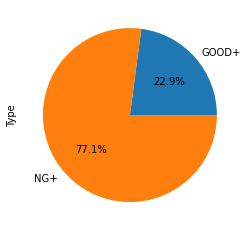

In [23]:
print(df_xt["classification"].value_counts())

df_xt.groupby('classification').size().plot(kind='pie',
                                       y = "classification",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [24]:
from sklearn.utils import resample
good_upsample = resample(df_good,
             replace=True,
             n_samples=len(df_notgood),
             random_state=42)

print(good_upsample.shape)

(488, 211)


In [25]:
print(good_upsample.shape)
print(df_notgood.shape)

(488, 211)
(488, 211)


In [26]:
# good_upsample = good_upsample.loc[~good_upsample.index.duplicated(keep='first')]
# df_notgood = df_notgood.loc[~df_notgood.index.duplicated(keep='first')]

In [27]:
df_notgood

,year,updated_categories,global_brand,product_status,region,country,ad_format,classification,meets_noticability_threshold,meets_on_memorability_threshold,...,direct_response,website_address_shown,hashtag_usage,number_of_words_supers,number_of_words_on_screen,size_of_words_supers_subtitles,number_of_scenes,avg_no_seconds_per_scene,video_end_scene_from_ad,video_end_logo
2,2021,ICE CREAM,BREYERS,ESTABLISHED,EUROPE,GERMANY,DIGITAL OUTDOOR,NG+,NO,NO,...,NO,NO,NO,8,35,4.18,1,9.90,YES,YES
3,2020,PERSONAL CARE,DOVE MEN+CARE,ESTABLISHED,EUROPE,ITALY,VIDEO,NG+,NO,YES,...,NO,NO,NO,9,59,4.69,18,1.66,NO,YES
4,2020,BEAUTY & WELLBEING,DOVE,ESTABLISHED,SEAA,VIETNAM,VIDEO,NG+,NO,YES,...,NO,NO,NO,5,214,4.56,55,1.09,NO,YES
5,2020,BEAUTY & WELLBEING,DOVE,ESTABLISHED,SEAA,VIETNAM,VIDEO,NG+,NO,NO,...,NO,NO,NO,28,209,7.19,80,1.65,NO,YES
8,2020,BEAUTY & WELLBEING,SUNSILK,ESTABLISHED,SEAA,VIETNAM,VIDEO,NG+,YES,NO,...,NO,NO,NO,5,90,4.22,12,1.24,YES,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,2022,HOME CARE,CIF,ESTABLISHED,EUROPE,TURKEY,SOCIAL MEDIA VIDEO,NG+,YES,YES,...,NO,NO,NO,2,14,3.41,1,6.00,YES,YES
626,2022,HOME CARE,CIF,ESTABLISHED,EUROPE,UK,SOCIAL MEDIA VIDEO,NG+,YES,NO,...,YES,NO,NO,12,18,5.86,1,5.90,YES,YES
627,2022,HOME CARE,PERSIL,ESTABLISHED,EUROPE,UK,SOCIAL MEDIA VIDEO,NG+,YES,NO,...,NO,YES,NO,0,11,3.11,1,6.00,YES,YES
631,2023,NUTRITION,THE VEGETARIAN BUTCHER,ESTABLISHED,EUROPE,UK,SOCIAL MEDIA VIDEO,NG+,YES,NO,...,NO,NO,NO,0,11,3.38,3,1.97,YES,YES


In [28]:
df_upsampled = pd.concat([good_upsample, df_notgood])
df_upsampled['classification'].value_counts()

GOOD+    488
NG+      488
Name: classification, dtype: int64

In [29]:
df_upsampled.shape

(976, 211)

In [30]:
#cols = df_upsampled.select_dtypes(exclude='object').columns

In [31]:
cols = df_upsampled.columns

In [32]:
df_upsampled

,year,updated_categories,global_brand,product_status,region,country,ad_format,classification,meets_noticability_threshold,meets_on_memorability_threshold,...,direct_response,website_address_shown,hashtag_usage,number_of_words_supers,number_of_words_on_screen,size_of_words_supers_subtitles,number_of_scenes,avg_no_seconds_per_scene,video_end_scene_from_ad,video_end_logo
447,2022,HOME CARE,VIM,ESTABLISHED,SEAA,VIETNAM,ONLINE VIDEO,GOOD+,YES,YES,...,NO,NO,NO,29,43,8.28,9,1.66,YES,YES
424,2021,NUTRITION,KNORR,ESTABLISHED,EUROPE,GERMANY,ONLINE VIDEO,GOOD+,YES,YES,...,NO,NO,NO,12,32,5.17,6,0.98,YES,YES
29,2021,BEAUTY & WELLBEING,DOVE,ESTABLISHED,NORTH AMERICA,USA,SOCIAL VIDEO,GOOD+,YES,YES,...,NO,NO,NO,6,14,6.36,3,2.00,NO,YES
481,2021,PERSONAL CARE,LUX,ESTABLISHED,MIDDLE EAST,KSA,ONLINE VIDEO,GOOD+,YES,YES,...,NO,NO,NO,25,48,7.30,6,1.65,NO,YES
339,2021,ICE CREAM,CORNETTO,ESTABLISHED,EUROPE,UK,FACEBOOK VIDEO,GOOD+,YES,YES,...,YES,NO,NO,4,10,16.86,1,5.90,NO,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,2022,HOME CARE,CIF,ESTABLISHED,EUROPE,TURKEY,SOCIAL MEDIA VIDEO,NG+,YES,YES,...,NO,NO,NO,2,14,3.41,1,6.00,YES,YES
626,2022,HOME CARE,CIF,ESTABLISHED,EUROPE,UK,SOCIAL MEDIA VIDEO,NG+,YES,NO,...,YES,NO,NO,12,18,5.86,1,5.90,YES,YES
627,2022,HOME CARE,PERSIL,ESTABLISHED,EUROPE,UK,SOCIAL MEDIA VIDEO,NG+,YES,NO,...,NO,YES,NO,0,11,3.11,1,6.00,YES,YES
631,2023,NUTRITION,THE VEGETARIAN BUTCHER,ESTABLISHED,EUROPE,UK,SOCIAL MEDIA VIDEO,NG+,YES,NO,...,NO,NO,NO,0,11,3.38,3,1.97,YES,YES


In [33]:
df_adformat = df_upsampled[df_upsampled["classification"] == 'GOOD+']
df_adformat = df_adformat.groupby(['ad_format'], as_index=False)['classification'].count()
df_adformat


,ad_format,classification
0,FACEBOOK VIDEO,4
1,INSTAGRAM,7
2,ONLINE VIDEO,182
3,SOCIAL MEDIA,15
4,SOCIAL MEDIA VIDEO,129
5,SOCIAL VIDEO,48
6,VIDEO,103


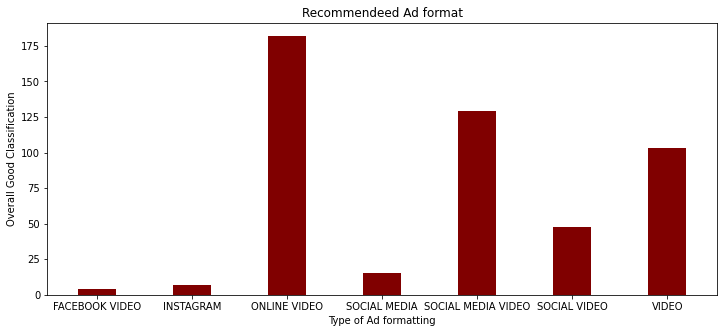

In [34]:
fig = plt.figure(figsize = (12, 5))


# creating the bar plot
plt.bar(df_adformat.ad_format ,df_adformat.classification,  color ='maroon', width =0.4)
 
plt.xlabel("Type of Ad formatting")
plt.ylabel("Overall Good Classification")
plt.title("Recommendeed Ad format")
plt.show()

In [35]:
frames = [df_upsampled.select_dtypes(include='object'),df_upsampled.select_dtypes(exclude='object')]
df_sorted = pd.concat(frames,axis=1).reset_index(drop = True)

In [36]:
df_sorted

,updated_categories,global_brand,product_status,region,country,ad_format,classification,meets_noticability_threshold,meets_on_memorability_threshold,meets_action_threshold,...,logo_placements_bottom_left_duration,logo_placements_bottom_center_duration,logo_placements_bottom_right_duration,time_of_human_introduction,no_of_people_featured_in_ad,number_of_words_supers,number_of_words_on_screen,size_of_words_supers_subtitles,number_of_scenes,avg_no_seconds_per_scene
0,HOME CARE,VIM,ESTABLISHED,SEAA,VIETNAM,ONLINE VIDEO,GOOD+,YES,YES,YES,...,0.0,0.0,3.7,0.1,2,29,43,8.28,9,1.66
1,NUTRITION,KNORR,ESTABLISHED,EUROPE,GERMANY,ONLINE VIDEO,GOOD+,YES,YES,YES,...,0.0,0.0,0.0,0.0,0,12,32,5.17,6,0.98
2,BEAUTY & WELLBEING,DOVE,ESTABLISHED,NORTH AMERICA,USA,SOCIAL VIDEO,GOOD+,YES,YES,YES,...,0.0,0.0,0.0,0.1,1,6,14,6.36,3,2.00
3,PERSONAL CARE,LUX,ESTABLISHED,MIDDLE EAST,KSA,ONLINE VIDEO,GOOD+,YES,YES,YES,...,0.0,3.0,3.0,0.1,1,25,48,7.30,6,1.65
4,ICE CREAM,CORNETTO,ESTABLISHED,EUROPE,UK,FACEBOOK VIDEO,GOOD+,YES,YES,YES,...,6.0,0.0,0.0,0.0,0,4,10,16.86,1,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,HOME CARE,CIF,ESTABLISHED,EUROPE,TURKEY,SOCIAL MEDIA VIDEO,NG+,YES,YES,YES,...,0.0,0.0,12.2,0.0,0,2,14,3.41,1,6.00
972,HOME CARE,CIF,ESTABLISHED,EUROPE,UK,SOCIAL MEDIA VIDEO,NG+,YES,NO,YES,...,0.0,0.0,6.0,0.0,0,12,18,5.86,1,5.90
973,HOME CARE,PERSIL,ESTABLISHED,EUROPE,UK,SOCIAL MEDIA VIDEO,NG+,YES,NO,YES,...,0.0,0.0,0.0,0.1,2,0,11,3.11,1,6.00
974,NUTRITION,THE VEGETARIAN BUTCHER,ESTABLISHED,EUROPE,UK,SOCIAL MEDIA VIDEO,NG+,YES,NO,YES,...,0.0,0.0,0.0,0.0,0,0,11,3.38,3,1.97


In [37]:
df_sorted.columns.get_loc("avg_no_seconds_per_scene")
# 172-210 onwards numerical data will start and up untill 0-171 we have categorical data so will be using these to encode.

210

In [38]:
cat_col= df_sorted.select_dtypes(include='object').columns
cat_col

Index(['updated_categories', 'global_brand', 'product_status', 'region',
       'country', 'ad_format', 'classification',
       'meets_noticability_threshold', 'meets_on_memorability_threshold',
       'meets_action_threshold',
       ...
       'logo_in_corner', 'human_presence', 'children_shown_in_ad',
       'price_of_product', 'monetary_reward', 'direct_response',
       'website_address_shown', 'hashtag_usage', 'video_end_scene_from_ad',
       'video_end_logo'],
      dtype='object', length=172)

In [39]:
num_col= df_sorted.select_dtypes(exclude='object').columns
num_col

Index(['year', 'product_first_shown', 'no_seconds_product_shown',
       'perc_of_ad_product_is_shown', 'number_of_products_shown',
       'time_product_being_consumed_eaten',
       'perc_of_ad_featuring_product_consumption',
       'time_product_being_used_non_food_',
       'perc_of_ad_featuring_product_being_used', 'no_of_audio_brand_cues',
       'no_of_distinctive_assets', 'no_scene_changes_first_3s',
       'message_introduced', 'time_message_present', 'number_of_messages',
       'number_of_seconds_of_speech', 'speech_duration_relative_to_ad',
       'number_of_words_in_audio', 'music_duration', 'brand_revealed_at',
       'number_of_seconds_brand_present', 'perc_of_ad_brand_present',
       'number_of_brand_displays', 'logo_placements_top_left_duration',
       'logo_placements_top_center_duration',
       'logo_placements_top_right_duration',
       'logo_placements_middle_left_duration',
       'logo_placements_middle_center_duration',
       'logo_placements_middle_right_du

In [40]:
# class ItemSelector():
#     def __init__(self, key):
#         self.key = key

#     def fit(self, x, y=None):
#         return self
# #
#     def transform(self, data_dict):
#         return data_dict[self.key]

In [41]:
# class MyLEncoder():

#     def transform(self, X, y=None, **fit_params):
#         enc = preprocessing.LabelEncoder()
#         encc = enc.fit(X)
#         enc_data = enc.transform(X)

#         return enc_data

#     def fit_transform(self, X, y=None, **fit_params):
#         self.fit(X, y, **fit_params)
#         return self.transform(X)

#     def fit(self, X, y=None, **fit_params):
#         return self

In [42]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.pipeline import FeatureUnion
# from sklearn import preprocessing

# encoding_pipeline =Pipeline([
#          ('union', FeatureUnion(
#         transformer_list=[ 
#          ('categorical', Pipeline([
#                                  ('selector', ItemSelector(key=cat_col)),

#                                 ('LabelEncoder', MyLEncoder()) ]))                              

# ]))
#                      ])

In [43]:
# X = df_sorted
# encoding_pipeline.fit_transform(X)
# X

In [44]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# numeric_transformer = StandardScaler()

# categorical_transformer = (OrdinalEncoder()) 

# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num", numeric_transformer, num_col),
#         ("cat", categorical_transformer, cat_col)
        
#     ]
# )


# # Column_Transf = ColumnTransformer([
# #     ('trf',LabelEncoder(sparse=False,drop='first', handle_unknown='ignore'),['batsman','bowler','team1', 'team2', 'venue'])
# # ]
# # ,remainder='passthrough')

# # pipe = Pipeline(steps=[
# #     ('step1',trf),
# #     ('step2',StandardScaler()),
# #     ('step3',RandomForestRegressor())
# # ])

In [45]:
# # Scale selected columns by index
# df_sorted.iloc[:, 0:171] = df_sorted.apply(LabelEncoder().fit_transform(df_sorted.iloc[:,0:171]))
# df_sorted.iloc[:, 172:] = df_sorted.apply(StandardScaler().fit_transform(df_sorted.iloc[:,172:]))

In [46]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in cat_col:
    df_sorted[feat] = le.fit_transform(df_sorted[feat].astype(str))

print (df_sorted.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Columns: 211 entries, updated_categories to avg_no_seconds_per_scene
dtypes: float64(25), int64(186)
memory usage: 1.6 MB
None


In [47]:
df_sorted

,updated_categories,global_brand,product_status,region,country,ad_format,classification,meets_noticability_threshold,meets_on_memorability_threshold,meets_action_threshold,...,logo_placements_bottom_left_duration,logo_placements_bottom_center_duration,logo_placements_bottom_right_duration,time_of_human_introduction,no_of_people_featured_in_ad,number_of_words_supers,number_of_words_on_screen,size_of_words_supers_subtitles,number_of_scenes,avg_no_seconds_per_scene
0,1,64,0,6,27,6,0,1,1,1,...,0.0,0.0,3.7,0.1,2,29,43,8.28,9,1.66
1,3,25,0,1,7,6,0,1,1,1,...,0.0,0.0,0.0,0.0,0,12,32,5.17,6,0.98
2,0,19,0,4,26,14,0,1,1,1,...,0.0,0.0,0.0,0.1,1,6,14,6.36,3,2.00
3,4,31,0,3,12,6,0,1,1,1,...,0.0,3.0,3.0,0.1,1,25,48,7.30,6,1.65
4,2,11,0,1,25,2,0,1,1,1,...,6.0,0.0,0.0,0.0,0,4,10,16.86,1,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,1,7,0,1,24,11,1,1,1,1,...,0.0,0.0,12.2,0.0,0,2,14,3.41,1,6.00
972,1,7,0,1,25,11,1,1,0,1,...,0.0,0.0,6.0,0.0,0,12,18,5.86,1,5.90
973,1,41,0,1,25,11,1,1,0,1,...,0.0,0.0,0.0,0.1,2,0,11,3.11,1,6.00
974,3,59,0,1,25,11,1,1,0,1,...,0.0,0.0,0.0,0.0,0,0,11,3.38,3,1.97


In [48]:
df_sorted.iloc[:, 172:] = StandardScaler().fit_transform(df_sorted.iloc[:,172:])

In [49]:
df_sorted

,updated_categories,global_brand,product_status,region,country,ad_format,classification,meets_noticability_threshold,meets_on_memorability_threshold,meets_action_threshold,...,logo_placements_bottom_left_duration,logo_placements_bottom_center_duration,logo_placements_bottom_right_duration,time_of_human_introduction,no_of_people_featured_in_ad,number_of_words_supers,number_of_words_on_screen,size_of_words_supers_subtitles,number_of_scenes,avg_no_seconds_per_scene
0,1,64,0,6,27,6,0,1,1,1,...,-0.263138,-0.396058,0.942608,-0.560252,0.074477,1.009859,0.044951,1.281214,0.044653,-0.267172
1,3,25,0,1,7,6,0,1,1,1,...,-0.263138,-0.396058,-0.265922,-0.602972,-0.711355,-0.143868,-0.184092,-0.448198,-0.242064,-0.653593
2,0,19,0,4,26,14,0,1,1,1,...,-0.263138,-0.396058,-0.265922,-0.560252,-0.318439,-0.551066,-0.558890,0.213538,-0.528781,-0.073962
3,4,31,0,3,12,6,0,1,1,1,...,-0.263138,0.346955,0.713967,-0.560252,-0.318439,0.738394,0.149062,0.736254,-0.242064,-0.272855
4,2,11,0,1,25,2,0,1,1,1,...,2.101345,-0.396058,-0.265922,-0.602972,-0.711355,-0.686799,-0.642179,6.052387,-0.719925,2.142275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,1,7,0,1,24,11,1,1,1,1,...,-0.263138,-0.396058,3.718959,-0.602972,-0.711355,-0.822532,-0.558890,-1.426900,-0.719925,2.199102
972,1,7,0,1,25,11,1,1,0,1,...,-0.263138,-0.396058,1.693856,-0.602972,-0.711355,-0.143868,-0.475602,-0.064502,-0.719925,2.142275
973,1,41,0,1,25,11,1,1,0,1,...,-0.263138,-0.396058,-0.265922,-0.560252,0.074477,-0.958264,-0.621357,-1.593724,-0.719925,2.199102
974,3,59,0,1,25,11,1,1,0,1,...,-0.263138,-0.396058,-0.265922,-0.602972,-0.711355,-0.958264,-0.621357,-1.443582,-0.528781,-0.091010


In [50]:
# scaler = StandardScaler()
# lable = LabelEncoder()
# #df_upsampled = df_upsampled.apply(LabelEncoder().fit_transform)
# # transform data
# #test = df_sorted.apply(lambda x: scaler.fit_transform(x) if (x.dtype != 'object') else 
#             lable.fit_transform(x))
# #scaled = pd.DataFrame(test,columns=cols)
# scaled = pd.DataFrame(scaler.fit_transform(df_upsampled.select_dtypes(exclude='object')), columns=cols)

In [51]:
df_sclaed =df_sorted.drop('year', axis=1)

In [52]:
df_sclaed

,updated_categories,global_brand,product_status,region,country,ad_format,classification,meets_noticability_threshold,meets_on_memorability_threshold,meets_action_threshold,...,logo_placements_bottom_left_duration,logo_placements_bottom_center_duration,logo_placements_bottom_right_duration,time_of_human_introduction,no_of_people_featured_in_ad,number_of_words_supers,number_of_words_on_screen,size_of_words_supers_subtitles,number_of_scenes,avg_no_seconds_per_scene
0,1,64,0,6,27,6,0,1,1,1,...,-0.263138,-0.396058,0.942608,-0.560252,0.074477,1.009859,0.044951,1.281214,0.044653,-0.267172
1,3,25,0,1,7,6,0,1,1,1,...,-0.263138,-0.396058,-0.265922,-0.602972,-0.711355,-0.143868,-0.184092,-0.448198,-0.242064,-0.653593
2,0,19,0,4,26,14,0,1,1,1,...,-0.263138,-0.396058,-0.265922,-0.560252,-0.318439,-0.551066,-0.558890,0.213538,-0.528781,-0.073962
3,4,31,0,3,12,6,0,1,1,1,...,-0.263138,0.346955,0.713967,-0.560252,-0.318439,0.738394,0.149062,0.736254,-0.242064,-0.272855
4,2,11,0,1,25,2,0,1,1,1,...,2.101345,-0.396058,-0.265922,-0.602972,-0.711355,-0.686799,-0.642179,6.052387,-0.719925,2.142275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,1,7,0,1,24,11,1,1,1,1,...,-0.263138,-0.396058,3.718959,-0.602972,-0.711355,-0.822532,-0.558890,-1.426900,-0.719925,2.199102
972,1,7,0,1,25,11,1,1,0,1,...,-0.263138,-0.396058,1.693856,-0.602972,-0.711355,-0.143868,-0.475602,-0.064502,-0.719925,2.142275
973,1,41,0,1,25,11,1,1,0,1,...,-0.263138,-0.396058,-0.265922,-0.560252,0.074477,-0.958264,-0.621357,-1.593724,-0.719925,2.199102
974,3,59,0,1,25,11,1,1,0,1,...,-0.263138,-0.396058,-0.265922,-0.602972,-0.711355,-0.958264,-0.621357,-1.443582,-0.528781,-0.091010


In [53]:
# fitting one of the model to get the feature which are having high impact
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

df_sclaed_X = df_sclaed.drop(['classification'], axis=1)
df_sclaed_y = df_sclaed['classification']

# converting from DF to numpy before fitting
X=df_sclaed_X.values
y=df_sclaed_y.values

#X_train, X_test, y_train, y_test = train_test_split(df_sclaed.drop(['classification'], axis=1), df_sclaed['classification'],random_state =42)
RFC = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

RFC.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [54]:
# dimensionality reduction using Boruta 
from boruta import BorutaPy

# define Boruta feature selection method
feat_selector = BorutaPy(RFC, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(X, y)

# Feature_accept = X.columns[feat_selector.support_].to_list()
# Feature_tentative = X.columns[feat_selector.support_weak_].to_list()
# print('features in the accept area:', Feature_accept)
# print('features in the tentative area:', Feature_tentative)



Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	209
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	209
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	209
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	209
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	209
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	209
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	209
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	45
Tentative: 	32
Rejected: 	132
Iteration: 	9 / 100
Confirmed: 	45
Tentative: 	32
Rejected: 	132
Iteration: 	10 / 100
Confirmed: 	45
Tentative: 	32
Rejected: 	132
Iteration: 	11 / 100
Confirmed: 	45
Tentative: 	32
Rejected: 	132
Iteration: 	12 / 100
Confirmed: 	46
Tentative: 	31
Rejected: 	132
Iteration: 	13 / 100
Confirmed: 	46
Tentative: 	31
Rejected: 	132
Iteration: 	14 / 100
Confirmed: 	46
Tentative: 	29
Rejected: 	134
Iteration: 	15 / 100
Confirmed: 	46
Tentative: 	29
Rejected: 	134
Iteration: 	16 / 100
Confirmed: 	

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=220, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7FEF100F2140),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FEF100F2140, verbose=2)

In [55]:
cols_support =df_sclaed_X.columns[feat_selector.support_]
cols_support

Index(['global_brand', 'product_status', 'region', 'country', 'ad_format',
       'meets_noticability_threshold', 'meets_on_memorability_threshold',
       'meets_action_threshold', 'food_shot', 'brand_purpose_1',
       'jingle_audio_mnemonic', 'dove_dba_gold_bird', 'dove_dba_packshots',
       'lifebuoy_dba_color_red', 'age_teenagers_13_18_',
       'gender_most_prominent', 'upbeat_characters',
       'female_characteristics_likeable', 'break_social_cultural_norms',
       'humor', 'logo_placements_top_left', 'hashtag_usage', 'video_end_logo',
       'product_first_shown', 'no_seconds_product_shown',
       'perc_of_ad_product_is_shown', 'number_of_products_shown',
       'perc_of_ad_featuring_product_being_used', 'no_of_distinctive_assets',
       'no_scene_changes_first_3s', 'message_introduced',
       'time_message_present', 'number_of_seconds_of_speech',
       'number_of_words_in_audio', 'music_duration', 'brand_revealed_at',
       'number_of_seconds_brand_present', 'perc_of_a

In [56]:

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

In [57]:
# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(df_sclaed.columns, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: updated_categories        Rank: 7,  Keep: False
Feature: global_brand              Rank: 1,  Keep: True
Feature: product_status            Rank: 1,  Keep: True
Feature: region                    Rank: 1,  Keep: True
Feature: country                   Rank: 1,  Keep: True
Feature: ad_format                 Rank: 1,  Keep: True
Feature: classification            Rank: 1,  Keep: True
Feature: meets_noticability_threshold Rank: 1,  Keep: True
Feature: meets_on_memorability_threshold Rank: 1,  Keep: True
Feature: meets_action_threshold    Rank: 109,  Keep: False
Feature: logo_animated             Rank: 1,  Keep: True
Feature: food_shot                 Rank: 126,  Keep: False
Feature: product_eaten_consumed    Rank: 92,  Keep: False
Feature: facial_reaction_to_usage  Rank: 129,  Keep: False
Feature: product_taste             Rank: 93,  Keep: False
Feature: ingredients_shown         Rank: 120,  Keep: False
Feature: product_being_made        Rank: 106,  Keep: False
Feature: product_as

In [58]:
# feat_selector.support_weak_

In [59]:
# test = X.values[feat_selector.support_].to_list()

In [60]:
# Df_ = pd.DataFrame(X_filtered)

In [61]:
#!pip install Boruta

In [62]:
X_filtered = pd.DataFrame(X_filtered,columns=cols_support)

In [63]:
X_filtered

,global_brand,product_status,region,country,ad_format,meets_noticability_threshold,meets_on_memorability_threshold,meets_action_threshold,food_shot,brand_purpose_1,...,logo_placements_middle_center_duration,logo_placements_middle_right_duration,logo_placements_bottom_center_duration,time_of_human_introduction,no_of_people_featured_in_ad,number_of_words_supers,number_of_words_on_screen,size_of_words_supers_subtitles,number_of_scenes,avg_no_seconds_per_scene
0,64.0,0.0,6.0,27.0,6.0,1.0,1.0,1.0,0.0,0.0,...,-0.132466,-0.491915,-0.396058,-0.560252,0.074477,1.009859,0.044951,1.281214,0.044653,-0.267172
1,25.0,0.0,1.0,7.0,6.0,1.0,1.0,1.0,1.0,1.0,...,0.004067,0.339946,-0.396058,-0.602972,-0.711355,-0.143868,-0.184092,-0.448198,-0.242064,-0.653593
2,19.0,0.0,4.0,26.0,14.0,1.0,1.0,1.0,0.0,1.0,...,-0.327512,-0.491915,-0.396058,-0.560252,-0.318439,-0.551066,-0.558890,0.213538,-0.528781,-0.073962
3,31.0,0.0,3.0,12.0,6.0,1.0,1.0,1.0,0.0,1.0,...,-0.366521,-0.491915,0.346955,-0.560252,-0.318439,0.738394,0.149062,0.736254,-0.242064,-0.272855
4,11.0,0.0,1.0,25.0,2.0,1.0,1.0,1.0,1.0,1.0,...,-0.678595,-0.491915,-0.396058,-0.602972,-0.711355,-0.686799,-0.642179,6.052387,-0.719925,2.142275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,7.0,0.0,1.0,24.0,11.0,1.0,1.0,1.0,0.0,1.0,...,-0.678595,-0.491915,-0.396058,-0.602972,-0.711355,-0.822532,-0.558890,-1.426900,-0.719925,2.199102
972,7.0,0.0,1.0,25.0,11.0,1.0,0.0,1.0,0.0,1.0,...,2.832236,-0.491915,-0.396058,-0.602972,-0.711355,-0.143868,-0.475602,-0.064502,-0.719925,2.142275
973,41.0,0.0,1.0,25.0,11.0,1.0,0.0,1.0,0.0,2.0,...,-0.678595,-0.491915,-0.396058,-0.560252,0.074477,-0.958264,-0.621357,-1.593724,-0.719925,2.199102
974,59.0,0.0,1.0,25.0,11.0,1.0,0.0,1.0,1.0,1.0,...,-0.678595,-0.491915,-0.396058,-0.602972,-0.711355,-0.958264,-0.621357,-1.443582,-0.528781,-0.091010


In [64]:
# #lambda x: x.str.upper() if (x.dtype == 'object') else x
# scaler = StandardScaler()
# # transform data
# scaled = scaler.fit_transform(data)

# import numpy as np

# from sklearn.preprocessing import LabelEncoder 

# df_upsampled = df_upsampled.apply(LabelEncoder().fit_transform)

# from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y,random_state =42)
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
X_filtered

,global_brand,product_status,region,country,ad_format,meets_noticability_threshold,meets_on_memorability_threshold,meets_action_threshold,food_shot,brand_purpose_1,...,logo_placements_middle_center_duration,logo_placements_middle_right_duration,logo_placements_bottom_center_duration,time_of_human_introduction,no_of_people_featured_in_ad,number_of_words_supers,number_of_words_on_screen,size_of_words_supers_subtitles,number_of_scenes,avg_no_seconds_per_scene
0,64.0,0.0,6.0,27.0,6.0,1.0,1.0,1.0,0.0,0.0,...,-0.132466,-0.491915,-0.396058,-0.560252,0.074477,1.009859,0.044951,1.281214,0.044653,-0.267172
1,25.0,0.0,1.0,7.0,6.0,1.0,1.0,1.0,1.0,1.0,...,0.004067,0.339946,-0.396058,-0.602972,-0.711355,-0.143868,-0.184092,-0.448198,-0.242064,-0.653593
2,19.0,0.0,4.0,26.0,14.0,1.0,1.0,1.0,0.0,1.0,...,-0.327512,-0.491915,-0.396058,-0.560252,-0.318439,-0.551066,-0.558890,0.213538,-0.528781,-0.073962
3,31.0,0.0,3.0,12.0,6.0,1.0,1.0,1.0,0.0,1.0,...,-0.366521,-0.491915,0.346955,-0.560252,-0.318439,0.738394,0.149062,0.736254,-0.242064,-0.272855
4,11.0,0.0,1.0,25.0,2.0,1.0,1.0,1.0,1.0,1.0,...,-0.678595,-0.491915,-0.396058,-0.602972,-0.711355,-0.686799,-0.642179,6.052387,-0.719925,2.142275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,7.0,0.0,1.0,24.0,11.0,1.0,1.0,1.0,0.0,1.0,...,-0.678595,-0.491915,-0.396058,-0.602972,-0.711355,-0.822532,-0.558890,-1.426900,-0.719925,2.199102
972,7.0,0.0,1.0,25.0,11.0,1.0,0.0,1.0,0.0,1.0,...,2.832236,-0.491915,-0.396058,-0.602972,-0.711355,-0.143868,-0.475602,-0.064502,-0.719925,2.142275
973,41.0,0.0,1.0,25.0,11.0,1.0,0.0,1.0,0.0,2.0,...,-0.678595,-0.491915,-0.396058,-0.560252,0.074477,-0.958264,-0.621357,-1.593724,-0.719925,2.199102
974,59.0,0.0,1.0,25.0,11.0,1.0,0.0,1.0,1.0,1.0,...,-0.678595,-0.491915,-0.396058,-0.602972,-0.711355,-0.958264,-0.621357,-1.443582,-0.528781,-0.091010


In [66]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier()

In [67]:
scores = cross_val_score(clf, X_train, y_train, cv=10)

In [68]:
scores

array([0.98648649, 1.        , 0.98630137, 1.        , 1.        ,
       1.        , 1.        , 0.98630137, 1.        , 1.        ])

In [69]:
print("%0.22f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.9959089226212514134318 accuracy with a standard deviation of 0.01


In [70]:
RFC.score(X_test, y_test)

0.9918032786885246

In [71]:
X_filtered.shape

(976, 52)

In [72]:
def confmat(cm):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, cmap=plt.cm.Wistia)
    plt.title('Model Confusion Matrix')
    fig.colorbar(cax)
    categories = ['Good','Not Good']
    ax.set_xticklabels([''] + categories)
    ax.set_yticklabels([''] + categories)

    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[j, i], va='center', ha='center')

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [73]:
def featureimp(columns, importances): 
    importances = pd.DataFrame(data={
        'Attribute': columns,
        'Importance': importances
    })
    importances = importances.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10, 10))
    plt.bar(x=importances['Attribute'][1:20], height=importances['Importance'][1:20], color='salmon')
    plt.title('Top 20 Impactful Feature', size=20)
    plt.xticks(rotation='vertical')
    plt.show()

In [74]:
def partuning(x):
    rscv_fit = x.fit(X_train, y_train)
    best_parameters = rscv_fit.best_params_
    best_estimator = rscv_fit.best_estimator_
    print(best_parameters)
    print(best_estimator)

In [75]:
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [76]:
rft = RandomForestClassifier()

grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}

rscv = RandomizedSearchCV(estimator = rft, 
                          param_distributions = grid_rf, 
                          cv = 10, 
                          n_jobs=-1, 
                          verbose=2, 
                          n_iter=48)

In [77]:
partuning(rscv)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
{'random_state': 42, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 7, 'bootstrap': False}
RandomForestClassifier(bootstrap=False, max_depth=7, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=500, random_state=42)


In [78]:
RFC = RandomForestClassifier(max_depth=6, min_samples_leaf=11, min_samples_split=10,random_state=42)
RFC.fit(X_train, y_train)
predrf = RFC.predict(X_test)
scorerf=accuracy_score(y_test,predrf)
print('Accuracy : %.5f'%scorerf)

Accuracy : 0.99180


In [79]:
print(classification_report(y_test, predrf, target_names = ['NOT GOOD','GOOD']))

              precision    recall  f1-score   support

    NOT GOOD       0.98      1.00      0.99       121
        GOOD       1.00      0.98      0.99       123

    accuracy                           0.99       244
   macro avg       0.99      0.99      0.99       244
weighted avg       0.99      0.99      0.99       244



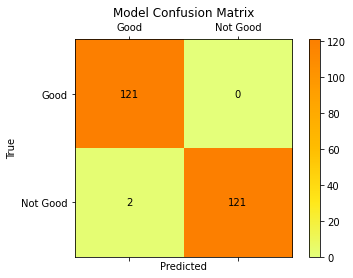

In [80]:
confm = confusion_matrix(y_test,predrf)
confmat(confm)

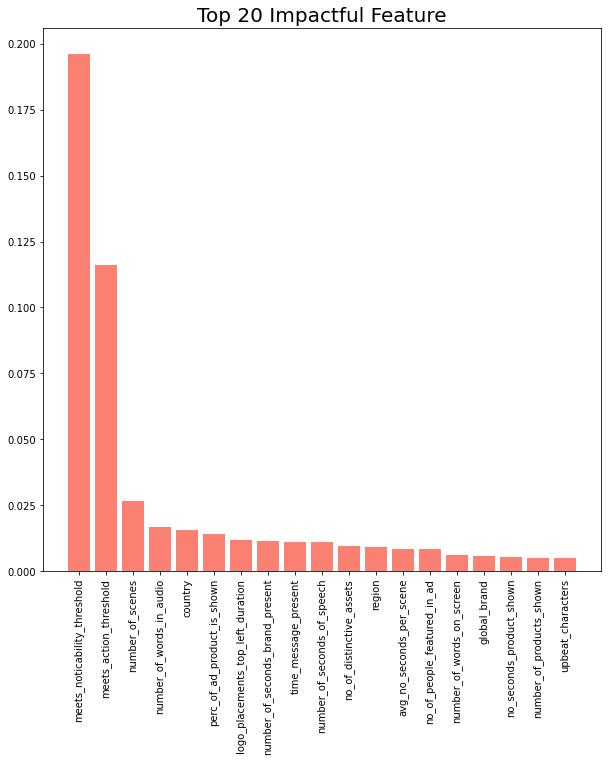

In [81]:
rfimp = RFC.feature_importances_
xcolumn = X_train.columns
featureimp(xcolumn, rfimp)

In [82]:
# feat_selector = BorutaPy(
#     RFC,
#     verbose=2,
#     n_estimators='auto',
#     random_state=1
# )

In [83]:
# feat_selector.fit(np.array(X_train), np.array(y_train))

In [84]:
# print("\n------Support and Ranking for each feature------")
# for i in range(len(feat_selector.support_)):
#     if feat_selector.support_[i]:
#         print("Passes the test: ", X_train.columns[i],
#               " - Ranking: ", feat_selector.ranking_[i])
#     else:
#         print("Doesn't pass the test: ",
#               X_train.columns[i], " - Ranking: ", feat_selector.ranking_[i])

### Gradient Boost

In [85]:
gbt = GradientBoostingClassifier()

grid_gb = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

rscv = RandomizedSearchCV(estimator = gbt, 
                          param_distributions = grid_gb, 
                          cv = 10, 
                          n_jobs=-1, 
                          verbose=2, 
                          n_iter=48)

In [86]:
partuning(rscv)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
{'n_estimators': 500, 'max_depth': 9, 'learning_rate': 1}
GradientBoostingClassifier(learning_rate=1, max_depth=9, n_estimators=500)


In [87]:
gradientb = GradientBoostingClassifier(learning_rate=1, max_depth=7, n_estimators=50)
gradientb.fit(X_train, y_train)
predgb = gradientb.predict(X_test)
scoregb=accuracy_score(y_test,predgb)
print('Accuracy : %.5f'%scoregb)

Accuracy : 0.99180


In [88]:
print(classification_report(y_test, predgb, target_names = ['NOT GOOD','GOOD']))

              precision    recall  f1-score   support

    NOT GOOD       0.98      1.00      0.99       121
        GOOD       1.00      0.98      0.99       123

    accuracy                           0.99       244
   macro avg       0.99      0.99      0.99       244
weighted avg       0.99      0.99      0.99       244



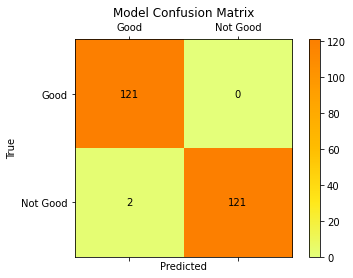

In [89]:
confm = confusion_matrix(y_test,predgb)
confmat(confm)

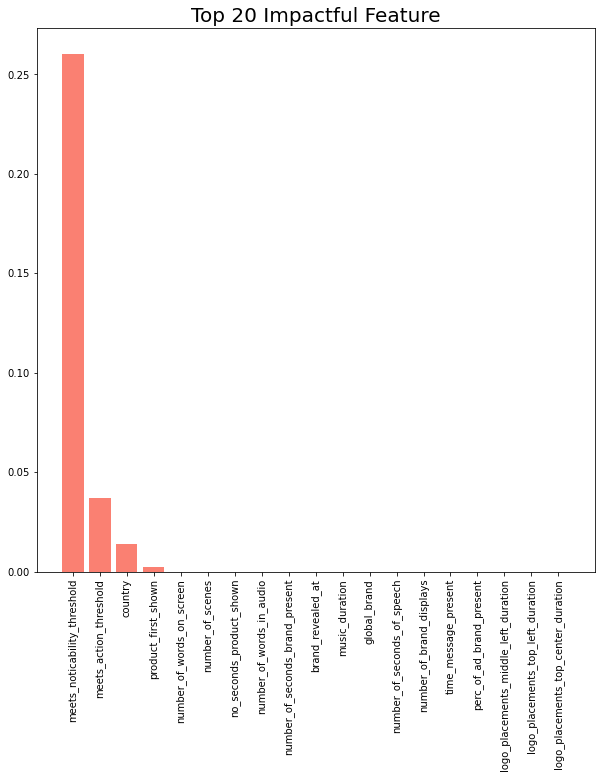

In [90]:
gbimp = gradientb.feature_importances_
xcolumn = X_train.columns
featureimp(xcolumn, gbimp)

### AdaBoostClassifier

In [91]:
abt = AdaBoostClassifier()

grid_ab = {
    "n_estimators":[5,50,250,500],
    "learning_rate":[0.01,0.1,1,10,100]
}

rscv = RandomizedSearchCV(estimator = abt, 
                          param_distributions = grid_ab, 
                          cv = 10, 
                          n_jobs=-1, 
                          verbose=2, 
                          n_iter=48)

In [92]:
partuning(rscv)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'n_estimators': 250, 'learning_rate': 0.1}
AdaBoostClassifier(learning_rate=0.1, n_estimators=250)


In [93]:
adab = AdaBoostClassifier(n_estimators = 50,learning_rate=0.01)
adab.fit(X_train, y_train)
predab = adab.predict(X_test)
scoreab=accuracy_score(y_test,predab)
print('Accuracy : %.2f'%scoreab)

Accuracy : 0.99


In [94]:
print(classification_report(y_test, predab, target_names = ['NOT GOOD','GOOD']))

              precision    recall  f1-score   support

    NOT GOOD       0.98      1.00      0.99       121
        GOOD       1.00      0.98      0.99       123

    accuracy                           0.99       244
   macro avg       0.99      0.99      0.99       244
weighted avg       0.99      0.99      0.99       244



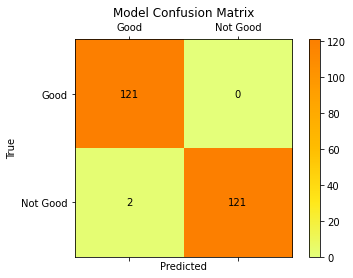

In [95]:
confm = confusion_matrix(y_test,predab)
confmat(confm)

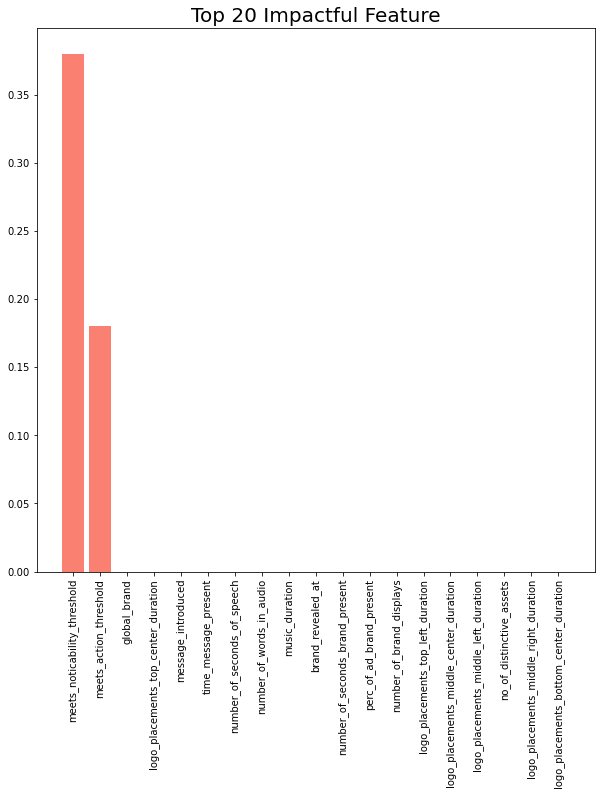

In [96]:
abimp = adab.feature_importances_
xcolumn = X_train.columns
featureimp(xcolumn, abimp)

# Logistic Regression 

In [97]:
lrt = LogisticRegression()

grid_lr = {
    "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "penalty":['none', 'l1', 'l2', 'elasticnet'],
    "C" : [100, 10, 1.0, 0.1, 0.01]
    
}

rscv = RandomizedSearchCV(estimator = lrt, 
                          param_distributions = grid_lr, 
                          cv = 10, 
                          n_jobs=-1, 
                          verbose=2, 
                          n_iter=48)

In [98]:
partuning(rscv)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END bootstrap=False, max_depth=1, min_samples_leaf=9, min_samples_split=2, n_estimators=500, random_state=42; total time=   1.2s
[CV] END bootstrap=True, max_depth=8, min_samples_leaf=7, min_samples_split=10, n_estimators=20, random_state=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, min_samples_leaf=7, min_samples_split=10, n_estimators=20, random_state=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, random_state=42; total time=   3.4s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=13, min_samples_split=2, n_estimators=500, random_state=1; total time=   1.9s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=13, min_samples_split=2, n_estimators=500, random_state=1; total time=   2.1s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=5, min_samples_split=10, n_estimators=500, random_state=42; total time=   1.8s
[

[CV] END ...lear{'solver': 'liblinear', 'penalty': 'l1', 'C': 10}
LogisticRegression(C=10, penalty='l1', solver='liblinear')


In [99]:
logit = LogisticRegression(C=100, solver='newton-cg')
logit.fit(X_train, y_train)
predlg = logit.predict(X_test)
scorelg = accuracy_score(y_test,predlg)
print('Accuracy : %.2f'%scorelg)

Accuracy : 0.99


In [100]:
print(classification_report(y_test, predlg, target_names = ['NOT GOOD','GOOD']))

              precision    recall  f1-score   support

    NOT GOOD       0.98      1.00      0.99       121
        GOOD       1.00      0.98      0.99       123

    accuracy                           0.99       244
   macro avg       0.99      0.99      0.99       244
weighted avg       0.99      0.99      0.99       244



ning_rate=100, max_depth=9, n_estimators=250; total time=   0.2s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=250; total time=   1.4s
[CV] END .....learning_rate=100, max_depth=7, n_estimators=5; total time=   0.0s
[CV] END .....learning_rate=100, max_depth=7, n_estimators=5; total time=   0.0s
[CV] END .....learning_rate=100, max_depth=7, n_estimators=5; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=250; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=250; total time=   0.7s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=250; total time=   0.8s
[CV] END ...learning_rate=100, max_depth=7, n_estimators=500; total time=   0.4s
[CV] END .................learning_rate=0.01, n_estimators=5; total time=   0.0s
[CV] END .................learning_rate=0.01, n_estimators=5; total time=   0.0s
[CV] END .................learning_rate=0.01

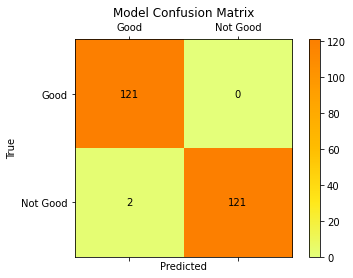

In [101]:
confm = confusion_matrix(y_test,predlg)
confmat(confm)

# GaussianNB

In [102]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
prednb = gnb.predict(X_test)
scorenb = accuracy_score(y_test,prednb)
print('Accuracy : %.2f'%scorenb)

Accuracy : 0.98


In [103]:
print(classification_report(y_test, prednb, target_names = ['NOT GOOD','GOOD']))

              precision    recall  f1-score   support

    NOT GOOD       0.98      0.98      0.98       121
        GOOD       0.98      0.98      0.98       123

    accuracy                           0.98       244
   macro avg       0.98      0.98      0.98       244
weighted avg       0.98      0.98      0.98       244



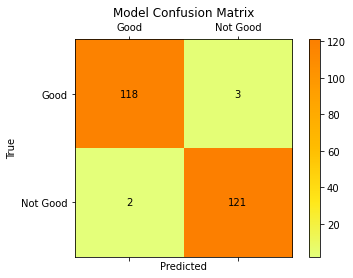

In [104]:
confm = confusion_matrix(y_test,prednb)
confmat(confm)

# KN classifier

In [105]:
knt = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
grid_kn = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

rscv = RandomizedSearchCV(estimator = knt, 
                          param_distributions = grid_kn, 
                          cv = 10, 
                          n_jobs=-1, 
                          verbose=2, 
                          n_iter=48)

In [106]:
partuning(rscv)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END bootstrap=False, max_depth=1, min_samples_leaf=9, min_samples_split=2, n_estimators=500, random_state=42; total time=   1.2s
[CV] END bootstrap=True, max_depth=8, min_samples_leaf=7, min_samples_split=10, n_estimators=20, random_state=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, random_state=42; total time=   3.4s
[CV] END bootstrap=False, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, random_state=42; total time=   3.2s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=50, random_state=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=50, random_state=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=5, min_samples_split=10, n_estimators=500, random_state=42; total time=   1.9s
[

In [107]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='distance')
knn.fit(X_train, y_train)
predkn = knn.predict(X_test)
scorekn = accuracy_score(y_test,predkn)
print('Accuracy : %.2f'%scorekn)

ples_leaf=7, min_samples_split=9, n_estimators=100, random_state=42; total time=   0.3s
[CV] END bootstrap=True, max_depth=13, min_samples_leaf=11, min_samples_split=10, n_estimators=20, random_state=2; total time=   0.1s
[CV] END bootstrap=True, max_depth=12, min_samples_leaf=9, min_samples_split=10, n_estimators=500, random_state=42; total time=   1.5s
[CV] END bootstrap=False, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=500, random_state=30; total time=   1.8s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, random_state=2; total time=   3.1s
[CV] END bootstrap=False, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=20, random_state=42; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=20, random_state=42; total time=   0.1s
[CV] END bootstrap=False, max_depth=11, min_samples_leaf=7, min_samples_split=2, n_estimators=20, random_st

[CV] END bootstrap=True, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=500, random_state=1; total time=   2.0s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=9, min_samples_split=2, n_estimators=500, random_state=42; total time=   1.8s
[CV] END bootstrap=True, max_depth=13, min_samples_leaf=11, min_samples_split=10, n_estimators=500, random_state=30; total time=   4.9s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=500, random_state=42; total time=   3.0s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=500, random_state=42; total time=   2.7s
[CV] END bootstrap=False, max_depth=1, min_samples_leaf=7, min_samples_split=10, n_estimators=1000, random_state=42; total time=   4.3s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, random_state=2; total time=   4.2s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=3, 

Accuracy : 0.91


In [108]:
print(classification_report(y_test, predkn, target_names = ['NOT GOOD','GOOD']))

              precision    recall  f1-score   support

    NOT GOOD       0.85      0.98      0.91       121
        GOOD       0.98      0.83      0.90       123

    accuracy                           0.91       244
   macro avg       0.92      0.91      0.91       244
weighted avg       0.92      0.91      0.91       244



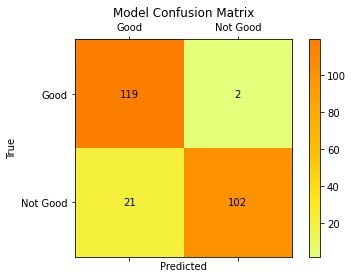

In [109]:
confm = confusion_matrix(y_test,predkn)
confmat(confm)

# SVM

In [110]:
svcl = SVC()

param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

rscv = RandomizedSearchCV(estimator = svcl, 
                          param_distributions = param_grid, 
                          cv = 10, 
                          n_jobs=-1, 
                          verbose=2, 
                          n_iter=48)

In [111]:
partuning(rscv)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END bootstrap=False, max_depth=1, min_samples_leaf=9, min_samples_split=2, n_estimators=500, random_state=42; total time=   1.2s
[CV] END bootstrap=False, max_depth=1, min_samples_leaf=9, min_samples_split=2, n_estimators=500, random_state=42; total time=   1.2s
[CV] END bootstrap=False, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, random_state=42; total time=   3.4s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=13, min_samples_split=2, n_estimators=500, random_state=1; total time=   2.1s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=50, random_state=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=50, random_state=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=50, random_state=30; total time=   0.2s
[CV] 

[CV] END bootstrap=False, max_depth=1, min_samples_leaf=9, min_samples_split=2, n_estimators=500, random_state=42; total time=   1.2s
[CV] END bootstrap=True, max_depth=8, min_samples_leaf=7, min_samples_split=10, n_estimators=20, random_state=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=8, min_samples_leaf=7, min_samples_split=10, n_estimators=20, random_state=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, random_state=42; total time=   3.4s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=13, min_samples_split=2, n_estimators=500, random_state=1; total time=   1.9s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=13, min_samples_split=2, n_estimators=500, random_state=1; total time=   2.1s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=5, min_samples_split=10, n_estimators=500, random_state=42; total time=   1.8s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=13, min_s

[CV] END bootstrap=True, max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=50, random_state=42; total time=   0.2s
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=50, random_state=1; total time=   0.2s
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=50, random_state=1; total time=   0.2s
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=50, random_state=1; total time=   0.2s
[CV] END bootstrap=True, max_depth=13, min_samples_leaf=11, min_samples_split=10, n_estimators=500, random_state=30; total time=   5.0s
[CV] END bootstrap=True, max_depth=13, min_samples_leaf=11, min_samples_split=10, n_estimators=500, random_state=30; total time=   3.6s
[CV] END bootstrap=False, max_depth=1, min_samples_leaf=7, min_samples_split=10, n_estimators=1000, random_state=42; total time=   4.0s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_

[CV] END bootstrap=False, max_depth=1, min_samples_leaf=9, min_samples_split=2, n_estimators=500, random_state=42; total time=   1.2s
[CV] END bootstrap=False, max_depth=1, min_samples_leaf=9, min_samples_split=2, n_estimators=500, random_state=42; total time=   1.2s
[CV] END bootstrap=False, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, random_state=42; total time=   3.4s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=13, min_samples_split=2, n_estimators=500, random_state=1; total time=   2.1s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=50, random_state=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=50, random_state=30; total time=   0.2s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=7, min_samples_split=2, n_estimators=50, random_state=30; total time=   0.2s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=5, min_sampl

{'kernel': 'poly', 'gamma': 0.01, 'C': 0.1}
SVC(C=0.1, gamma=0.01, kernel='poly')


In [112]:
svc = SVC(C=1, gamma=0.001, kernel='poly')
svc.fit(X_train, y_train)
predsvc = svc.predict(X_test)
scoresvc = accuracy_score(y_test,predsvc)
print('Accuracy : %.2f'%scoresvc)

Accuracy : 0.89


In [113]:
print(classification_report(y_test, predsvc, target_names = ['NOT GOOD','GOOD']))

              precision    recall  f1-score   support

    NOT GOOD       0.88      0.91      0.89       121
        GOOD       0.91      0.88      0.89       123

    accuracy                           0.89       244
   macro avg       0.89      0.89      0.89       244
weighted avg       0.89      0.89      0.89       244



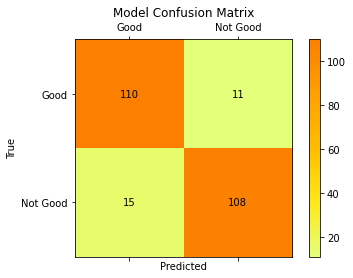

In [114]:
confm = confusion_matrix(y_test,predsvc)
confmat(confm)

In [115]:
RFC.score(X_test, y_test)

0.9918032786885246

LR: 0.982229 (0.016245)
LDA: 0.995927 (0.008673)
KNN: 0.806109 (0.036475)
ADA: 0.995927 (0.008673)
NB: 0.990466 (0.008688)
SVM: 0.698241 (0.071505)
GR: 0.997297 (0.008108)


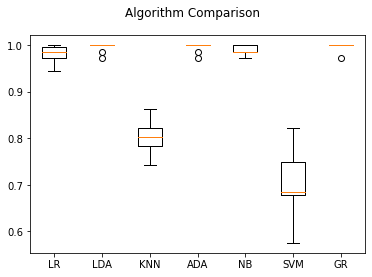

[CV] END ..............C=10, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..............C=10, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .....................C=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .....................C=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .....................C=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .....................C=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..............C=0.1, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ..............C=0.1, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ..............C=0.1

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

] END ..............C=1.0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .....................C=1.0, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....................C=1.0, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....................C=1.0, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....................C=1.0, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....................C=1.0, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....................C=1.0, penalty=l1, solver=saga; total time=   0.1s
[CV] END .metric=minkowski, n_neighbors=11, weights=distance; total time=   0.1s
[CV] END ..metric=manhattan, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_

processing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Settin

neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=19, weights=unifor

[CV] END ..............C=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..............C=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..............C=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..............C=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..............C=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..................C=0.01, penalty=none, solver=saga; total time=   0.1s
[CV] END ..................C=0.01, penalty=none, solver=saga; total time=   0.1s
[CV] END ..................C=0.01, penalty=none, solver=saga; total time=   0.1s
[CV] END ..................C=0.01, penalty=none, solver=saga; total time=   0.1s
[CV] END ..................C=0.01, penalty=none, solver=saga; total time=   0.1s
[CV] END ..................C=0.01, penalty=none, solver=saga; total time=   0.1s
[CV] END ............C=0.01, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ............C=0.01,

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore

ance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=17, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=17, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=17, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=17, weights=uniform; total time=   0.0s
[CV

 the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:

eighbors=11, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=11, weights=distance; total time=   0.0s
[CV] END .metric=minkowski, n_neighbors=19, weights=distance; total time=   0.0s
[CV] END .metric=minkowski, n_neighbors=19, weights=distance; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.2s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=7, weights=unifor


    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-

m; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=17, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END .metric=manhattan, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=17, weights=uniform; total time=   0.0s
[CV] E

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

 n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=19, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=19, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=19, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=19, weights=dist

[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..............C=10, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .....................C=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .....................C=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...................

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *

100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.4s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.6s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.2s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.1s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.2s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.1s
[CV] END ........C=1.0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=1.0, penalty=elasticnet, solver=liblinea

alues, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/opt/anacon

nalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; 

da3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/

[CV] END ....................C=0.1, penalty=none, solver=sag; total time=   0.1s
[CV] END ....................C=0.1, penalty=none, solver=sag; total time=   0.1s
[CV] END ....................C=0.1, penalty=none, solver=sag; total time=   0.1s
[CV] END ........C=1.0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=1.0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..............C=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..............C=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..............C=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..............C=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..................C=0.01, penalty=none, solver=saga; total time=   0.1s
[CV] END ..................C=0.01, penalty=none, solver=saga; total time=   0.1s
[CV] END ..................C=0.01, penalty=none, solver=saga; total time=   0.1s
[CV] END ..................C

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

ND ..metric=minkowski, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=17, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=13, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *

[CV] END .......C=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ...................C=100, penalty=none, solver=saga; total time=   0.1s
[CV] END ...................C=100, penalty=none, solver=saga; total time=   0.1s
[CV] END ..................C=1.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..................C=1.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..................C=1.0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..................C=1.0, penalty=none, solver=lbfgs; total time=   0.2s
[CV] END .............C=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .............C=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .............C=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .............C=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .............C=10, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .............C=10, 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore

ND ..metric=manhattan, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=11, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=9, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_nei

[CV] END .......C=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=100, penalty=none, solver=saga; total time=   0.1s
[CV] END ...................C=100, penalty=none, solver=saga; total time=   0.1s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.1s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.2s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.6s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   0.2s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=1

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

In [116]:
# prepare configuration for cross validation test harness
from sklearn import model_selection
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GR', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()